### Load Processed Data

In [1]:
import numpy as np
import pickle

# Load the arrays
train_x = np.load('../processed_data/train_x.npy')
test_x = np.load('../processed_data/test_x.npy')
train_y = np.load('../processed_data/train_y.npy')
test_y = np.load('../processed_data/test_y.npy')

# Load the vocab dictionaries
with open('../processed_data/words_vocab.pkl', 'rb') as f:
    words_vocab = pickle.load(f)

with open('../processed_data/pos_vocab.pkl', 'rb') as f:
    pos_vocab = pickle.load(f)

with open('../processed_data/ners_vocab.pkl', 'rb') as f:
    ners_vocab = pickle.load(f)

# Load the words, poss, and ners lists
with open('../processed_data/words.pkl', 'rb') as f:
    words = pickle.load(f)

with open('../processed_data/poss.pkl', 'rb') as f:
    poss = pickle.load(f)

with open('../processed_data/ners.pkl', 'rb') as f:
    ners = pickle.load(f)

# Define the number of unique words, POS tags, and NER tags
nbr_words = len(words_vocab)
nbr_pos = len(pos_vocab)
nbr_ners = len(ners_vocab)

# Define maximum sentence length
max_len = 25


### Building the model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow_addons.layers import CRF

ModuleNotFoundError: No module named 'tensorflow_addons'

In [ ]:
# Define the input layer
input_word = Input(shape=(max_len,))

# Add an embedding layer
model = Embedding(input_dim=nbr_words, output_dim=50, input_length=max_len)(input_word)

# Add a SpatialDropout1D layer
model = SpatialDropout1D(0.1)(model)

# Add a Bidirectional LSTM layer
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)

# Add a TimeDistributed Dense layer
model = TimeDistributed(Dense(100, activation="relu"))(model)

In [ ]:
# Add a CRF layer
crf = CRF(nbr_pos)
out = crf(model)

vocab size = 16248
embedding size = 25
number of possible labels = 15


In [ ]:
# defining the model
model = Model(input_word, out)
print(POS_model.summary())

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss=crf.loss, metrics=[crf.accuracy])

# Train the model
history = model.fit(train_x, np.array(train_y), batch_size=32, epochs=5, validation_split=0.1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 25)            406200    
                                                                 
 lstm (LSTM)                 (None, 25, 100)           50400     
                                                                 
Total params: 456,600
Trainable params: 456,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_x, np.array(test_y), verbose=1)

Epoch 1/10
102/102 [==============================] - 6s 32ms/step - loss: 1.7004 - accuracy: 0.6267 - val_loss: 1.0643 - val_accuracy: 0.7196
Epoch 2/10
102/102 [==============================] - 3s 33ms/step - loss: 0.8927 - accuracy: 0.7504 - val_loss: 1.0110 - val_accuracy: 0.7352
Epoch 3/10
102/102 [==============================] - 3s 32ms/step - loss: 0.7881 - accuracy: 0.7637 - val_loss: 0.7981 - val_accuracy: 0.7780
Epoch 4/10
102/102 [==============================] - 3s 33ms/step - loss: 0.6738 - accuracy: 0.8136 - val_loss: 0.7432 - val_accuracy: 0.8058
Epoch 5/10
102/102 [==============================] - 3s 34ms/step - loss: 0.4544 - accuracy: 0.8711 - val_loss: 0.7692 - val_accuracy: 0.8352
Epoch 6/10
102/102 [==============================] - 4s 36ms/step - loss: 0.2931 - accuracy: 0.9243 - val_loss: 0.8827 - val_accuracy: 0.8512
Epoch 7/10
102/102 [==============================] - 3s 29ms/step - loss: 0.4291 - accuracy: 0.8662 - val_loss: 0.6694 - val_accuracy: 0.8286

In [ ]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

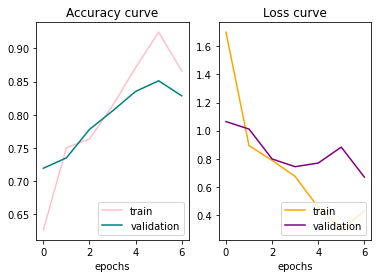

In [12]:
import matplotlib.pyplot as plt
# plotting the accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='pink')
plt.plot(history.history['val_accuracy'], color='teal')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epochs')
plt.title('Accuracy curve')

# plotting the loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='purple')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epochs')
plt.title('Loss curve')

plt.show()

### Evaluate the model

In [13]:
test_loss, test_accuracy  = POS_model.evaluate(test_x, test_y, batch_size=128)
print(f'test accuracy: {test_accuracy}\ntest loss: {test_loss}')

7/7 [==============================] - 0s 26ms/step - loss: 0.6694 - accuracy: 0.8286
test accuracy: 0.8285714387893677
test loss: 0.6693506240844727


In [15]:
i =  np.random.randint(0, test_x.shape[0])
print("This is sentence:",i)
p = POS_model.predict(np.array([test_x[i]]))
p = np.argmax(p, axis=-1)

print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(test_x[i], test_y[i], p[0]):
    print("{:15}{}\t{}".format(words[w-1], poss[true-1], poss[pred-1]))

This is sentence: 274
1/1 [==============================] - 0s 299ms/step
Word           True 	 Pred

------------------------------
খবর            NNC	VF
পেয়ে          VNF	VNF
বাকিদের        NNC	VNF
উদ্ধার         NNC	NNC
করে            VNF	VNF
ঢাকা           NNP	NNP
মেডিক্যালে     NNP	NNC
নিলে           VNF	VNF
চিকিৎসকরা      NNC	NNC
চালক           NNC	NNC
বিল্লালকেও     NNP	NNC
মৃত            ADJ	NNC
ঘোষণা         NNC	NNC
করেন।          VF	VF
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
